Understanding and exploring our datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
uploaded=files.upload()
import io
df1 = pd.read_csv(io.BytesIO(uploaded['dataset1.csv']))

Saving dataset1.csv to dataset1.csv


In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
uploaded=files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['dataset2.csv']))

Saving dataset2.csv to dataset2.csv


In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
uploaded=files.upload()
import io
df3 = pd.read_csv(io.BytesIO(uploaded['dataset3.csv']))

Saving dataset3.csv to dataset3.csv


In [ ]:
df4=pd.merge(df1,df2)
df4.head()

,Unnamed: 0,Country,Year,Status,percentage expenditure,Total expenditure,GDP,Population,Income composition of resources,Schooling,Life expectancy,Adult Mortality,infant deaths,under-five deaths
0,0,Afghanistan,2015,Developing,71.279624,8.16,584.259210,33736494.0,0.479,10.1,65.0,263.0,62,83
1,1,Afghanistan,2014,Developing,73.523582,8.18,612.696514,327582.0,0.476,10.0,59.9,271.0,64,86
2,2,Afghanistan,2013,Developing,73.219243,8.13,631.744976,31731688.0,0.470,9.9,59.9,268.0,66,89
3,3,Afghanistan,2012,Developing,78.184215,8.52,669.959000,3696958.0,0.463,9.8,59.5,272.0,69,93
4,4,Afghanistan,2011,Developing,7.097109,7.87,63.537231,2978599.0,0.454,9.5,59.2,275.0,71,97


In [ ]:
df=pd.merge(df4,df3)
df.head()
df.drop(df.columns[0], axis=1, inplace=True)
df.head()


,Country,Year,Status,percentage expenditure,Total expenditure,GDP,Population,Income composition of resources,Schooling,Life expectancy,...,under-five deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,71.279624,8.16,584.259210,33736494.0,0.479,10.1,65.0,...,83,0.01,65.0,1154,19.1,6.0,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,73.523582,8.18,612.696514,327582.0,0.476,10.0,59.9,...,86,0.01,62.0,492,18.6,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,73.219243,8.13,631.744976,31731688.0,0.470,9.9,59.9,...,89,0.01,64.0,430,18.1,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,78.184215,8.52,669.959000,3696958.0,0.463,9.8,59.5,...,93,0.01,67.0,2787,17.6,67.0,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,7.097109,7.87,63.537231,2978599.0,0.454,9.5,59.2,...,97,0.01,68.0,3013,17.2,68.0,68.0,0.1,18.2,18.2


In [ ]:
df.shape

(2938, 22)

In [ ]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [ ]:
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)


In [ ]:
original_df=df
original_df

,country,year,status,percentage_expenditure,total_expenditure,gdp,population,income_composition_of_resources,schooling,life_expectancy,...,under-five_deaths,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv/aids,thinness_10-19_years,thinness_5-9_years
0,Afghanistan,2015,Developing,71.279624,8.16,584.259210,33736494.0,0.479,10.1,65.0,...,83.0,0.01,65.0,1154,19.1,6.0,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,73.523582,8.18,612.696514,327582.0,0.476,10.0,59.9,...,86.0,0.01,62.0,492,18.6,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,73.219243,8.13,631.744976,31731688.0,0.470,9.9,59.9,...,89.0,0.01,64.0,430,18.1,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,78.184215,8.52,669.959000,3696958.0,0.463,9.8,59.5,...,93.0,0.01,67.0,2787,17.6,67.0,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,7.097109,7.87,63.537231,2978599.0,0.454,9.5,59.2,...,97.0,0.01,68.0,3013,17.2,68.0,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,0.000000,7.13,454.366654,12777511.0,0.407,9.2,44.3,...,42.0,4.36,68.0,31,27.1,67.0,65.0,33.6,9.4,9.4
2934,Zimbabwe,2003,Developing,0.000000,6.52,453.351155,12633897.0,0.418,9.5,44.5,...,41.0,4.06,7.0,998,26.7,7.0,68.0,36.7,9.8,9.9
2935,Zimbabwe,2002,Developing,0.000000,6.53,57.348340,125525.0,0.427,10.0,44.8,...,40.0,4.43,73.0,304,26.3,73.0,71.0,39.8,1.2,1.3
2936,Zimbabwe,2001,Developing,0.000000,6.16,548.587312,12366165.0,0.427,9.8,45.3,...,39.0,1.72,76.0,529,25.9,76.0,75.0,42.1,1.6,1.7


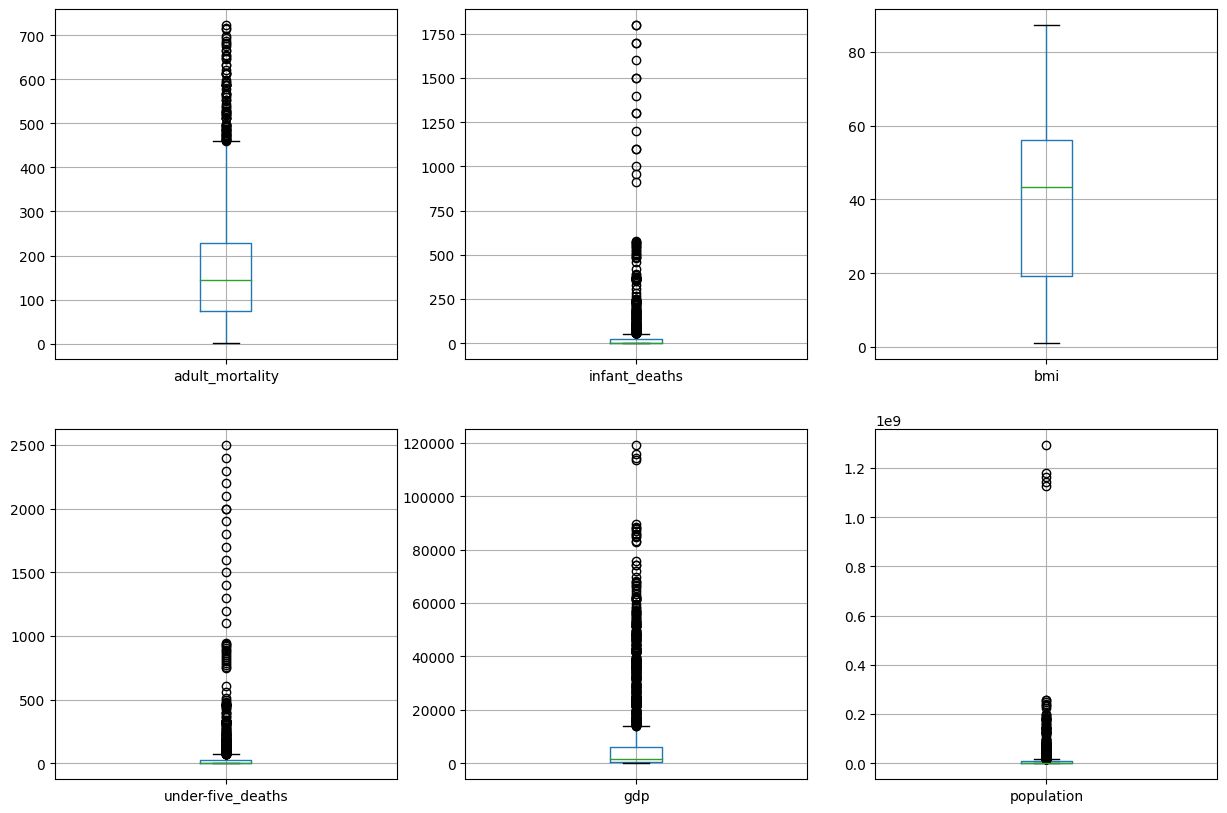

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

In [ ]:
import numpy as np
mort_5_percentile = np.percentile(df.adult_mortality.dropna(), 5)
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
df.infant_deaths = df.infant_deaths.replace(0, np.nan)
df.bmi = df.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
df['under-five_deaths'] = df['under-five_deaths'].replace(0, np.nan)

In [ ]:
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [ ]:
nulls_breakdown()

[iloc = 4] total_expenditure has 226 null values: 7.69% null
[iloc = 5] gdp has 448 null values: 15.25% null
[iloc = 6] population has 652 null values: 22.19% null
[iloc = 7] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 8] schooling has 163 null values: 5.55% null
[iloc = 9] life_expectancy has 10 null values: 0.34% null
[iloc = 10] adult_mortality has 155 null values: 5.28% null
[iloc = 11] infant_deaths has 848 null values: 28.86% null
[iloc = 12] under-five_deaths has 785 null values: 26.72% null
[iloc = 13] alcohol has 194 null values: 6.6% null
[iloc = 14] hepatitis_b has 553 null values: 18.82% null
[iloc = 16] bmi has 1456 null values: 49.56% null
[iloc = 17] polio has 19 null values: 0.65% null
[iloc = 18] diphtheria has 19 null values: 0.65% null
[iloc = 20] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 21] thinness_5-9_years has 34 null values: 1.16% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null valu

In [ ]:
df.drop('bmi', axis=1, inplace=True)

In [ ]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

[]

In [ ]:
(len(df[cols].dropna())/len(df))*100

100.0

In [ ]:
df.dropna(subset=cols,inplace=True)
df.shape

(2888, 21)

<Axes: ylabel='Density'>

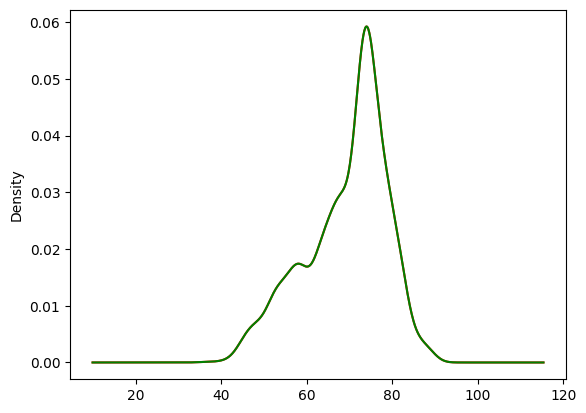

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
original_df['life_expectancy'].plot.density(color='red')

# data after cca
df['life_expectancy'].plot.density(color='green')

<Axes: ylabel='Density'>

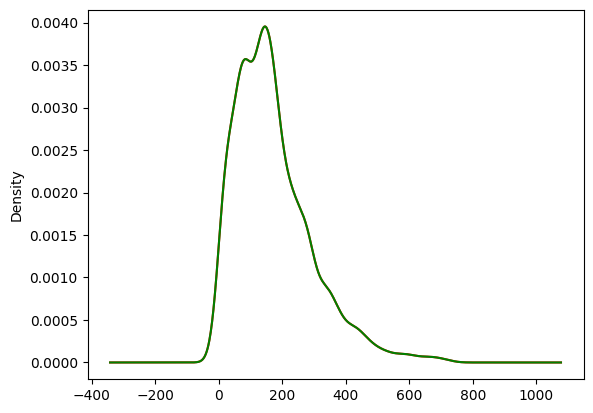

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
original_df['adult_mortality'].plot.density(color='red')

# data after cca
df['adult_mortality'].plot.density(color='green')

<Axes: ylabel='Density'>

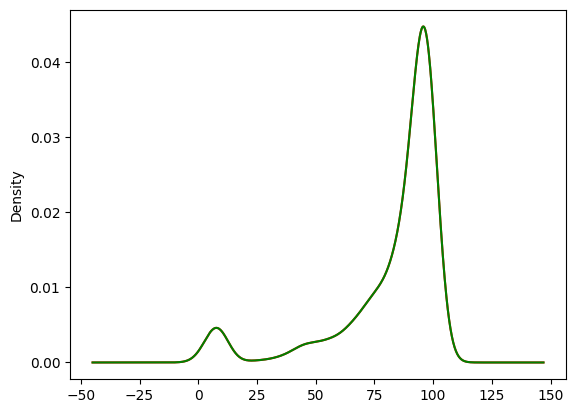

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
original_df['polio'].plot.density(color='red')

# data after cca
df['polio'].plot.density(color='green')

<Axes: ylabel='Density'>

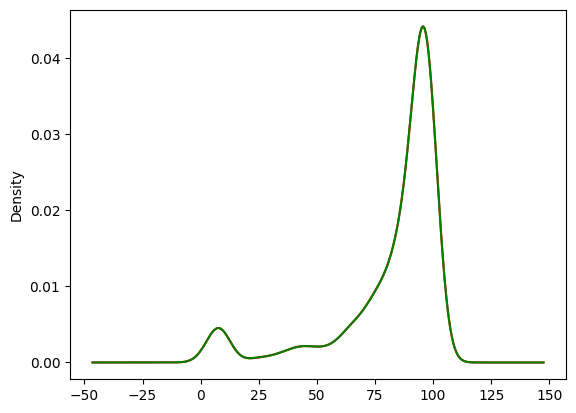

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
original_df['diphtheria'].plot.density(color='red')

# data after cca
df['diphtheria'].plot.density(color='green')

<Axes: ylabel='Density'>

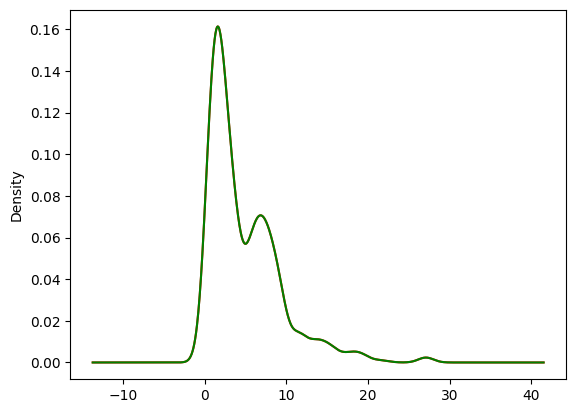

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
original_df['thinness_10-19_years'].plot.density(color='red')

# data after cca
df['thinness_10-19_years'].plot.density(color='green')

<Axes: ylabel='Density'>

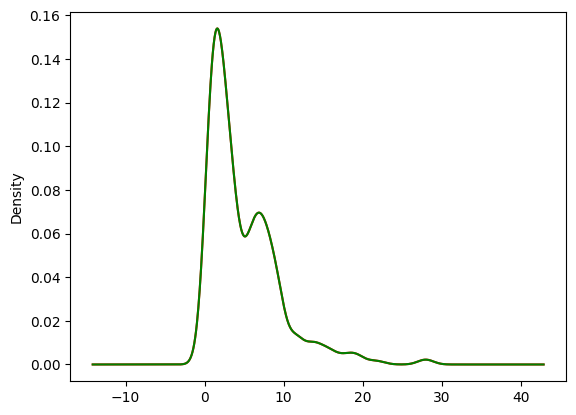

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
original_df['thinness_5-9_years'].plot.density(color='red')

# data after cca
df['thinness_5-9_years'].plot.density(color='green')

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

cols_drop=['country','status']
temp_df=df.drop(cols_drop,axis=1)
cols_df=df[cols_drop]
# Create an instance of IterativeImputer
imputer = IterativeImputer(random_state=0)

# Fit and transform the imputer on your data
X_imputed = imputer.fit_transform(temp_df)

# The result is a NumPy array with imputed values
# Convert it back to a DataFrame if needed
df_imputed = pd.DataFrame(X_imputed, columns=temp_df.columns)
# new_df=pd.merge(cols_df,df_imputed,on='Year')
new_df = cols_df.merge(df_imputed, left_index=True, right_index=True)
df=new_df

In [ ]:
nulls_breakdown(new_df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


Handling outliers

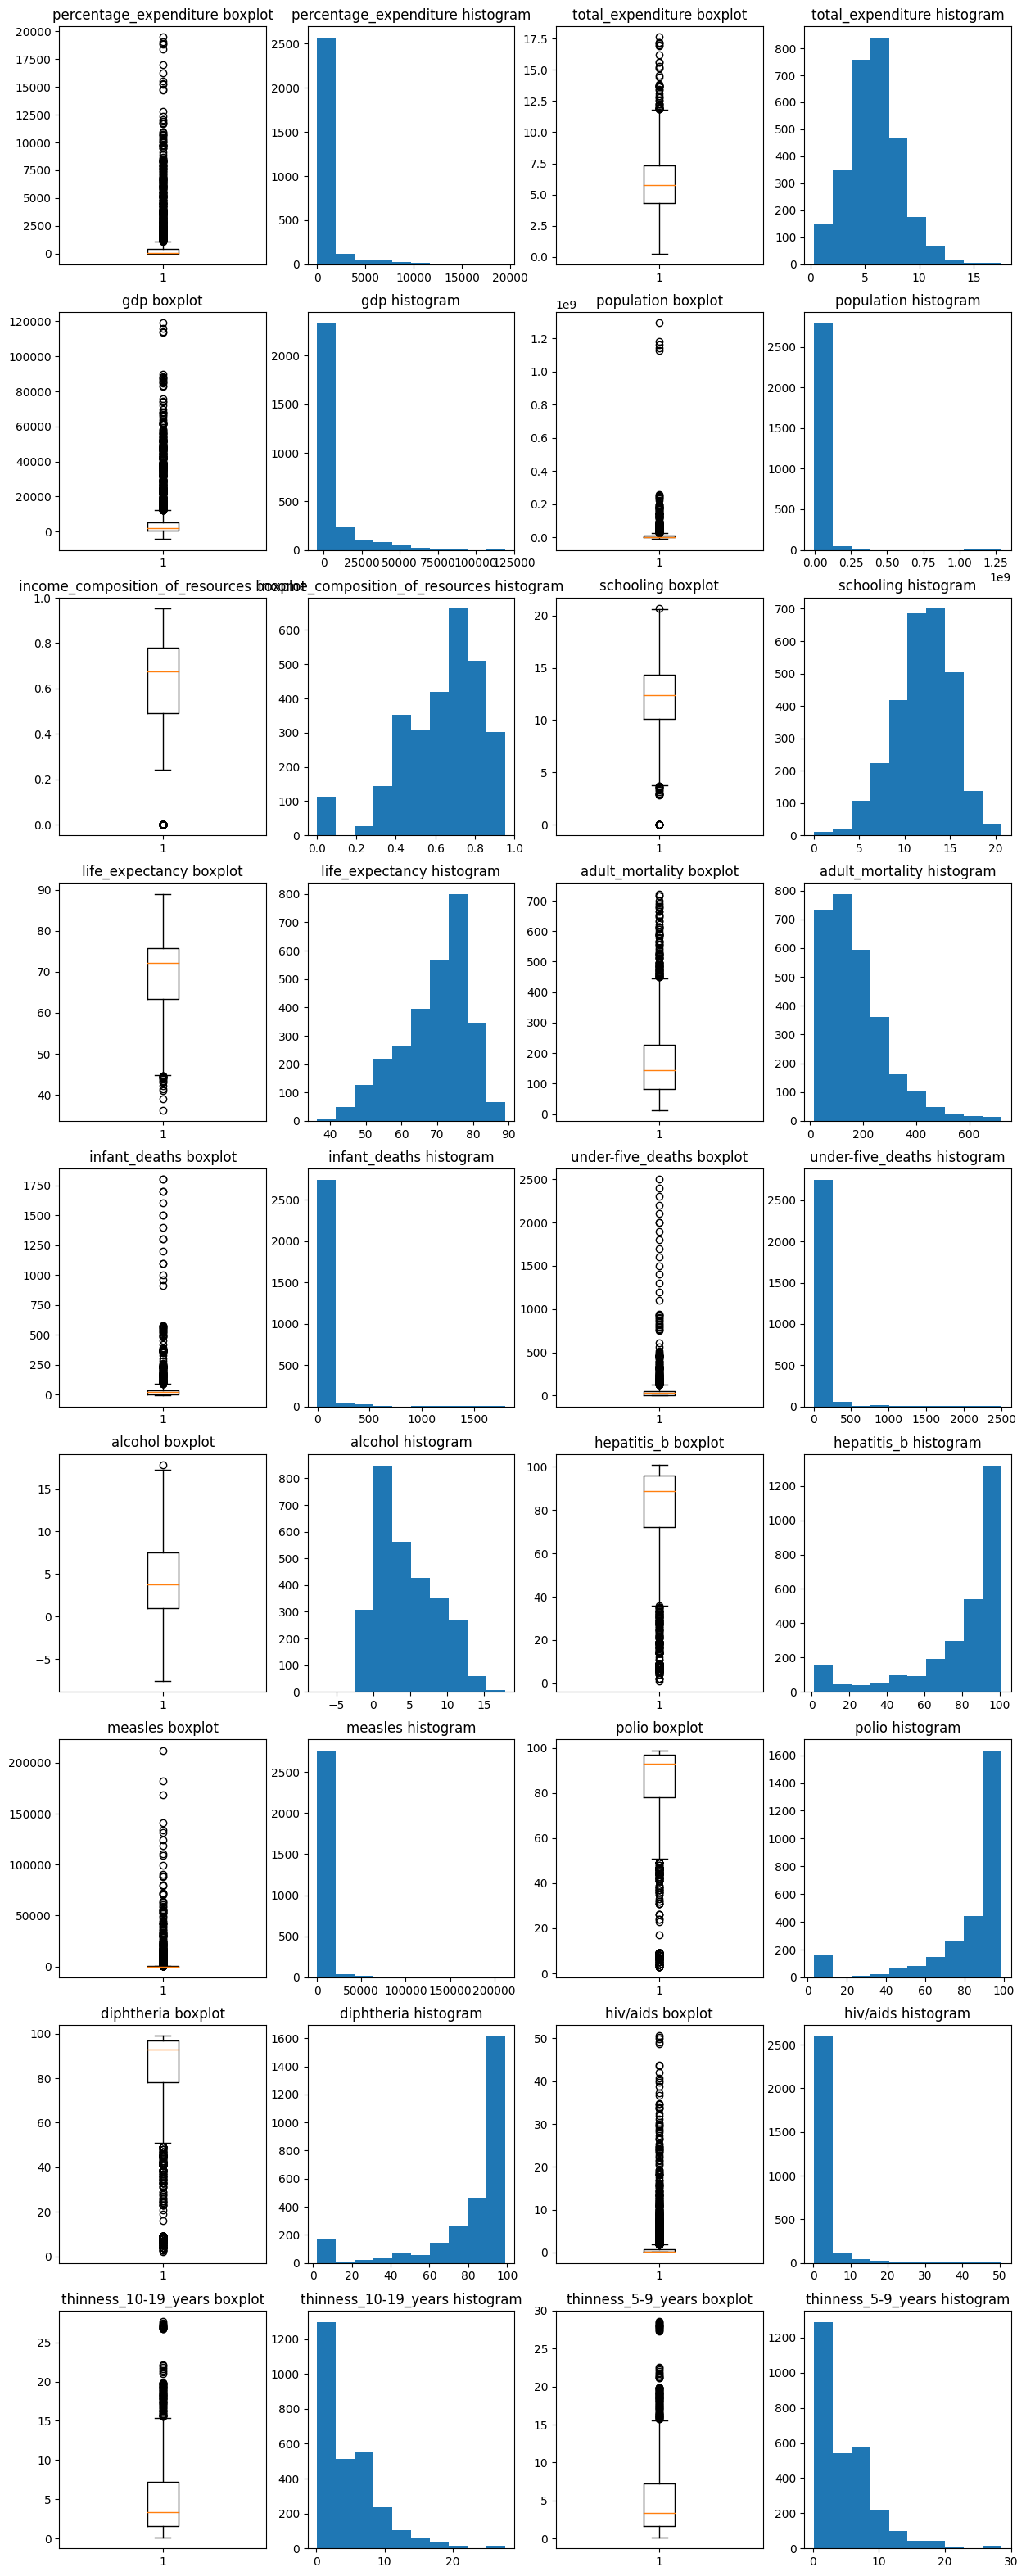

In [ ]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

In [ ]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [ ]:
for col in cont_vars:
    outlier_count(col)

---------------percentage_expenditure---------------
Number of outliers: 373
Percent of data that is outlier: 13.14%
---------------total_expenditure---------------
Number of outliers: 43
Percent of data that is outlier: 1.52%
---------------gdp---------------
Number of outliers: 401
Percent of data that is outlier: 14.13%
---------------population---------------
Number of outliers: 212
Percent of data that is outlier: 7.47%
---------------income_composition_of_resources---------------
Number of outliers: 114
Percent of data that is outlier: 4.02%
---------------schooling---------------
Number of outliers: 26
Percent of data that is outlier: 0.92%
---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.6%
---------------adult_mortality---------------
Number of outliers: 94
Percent of data that is outlier: 3.31%
---------------infant_deaths---------------
Number of outliers: 149
Percent of data that is outlier: 5.25%
---------------under-f

In [ ]:

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

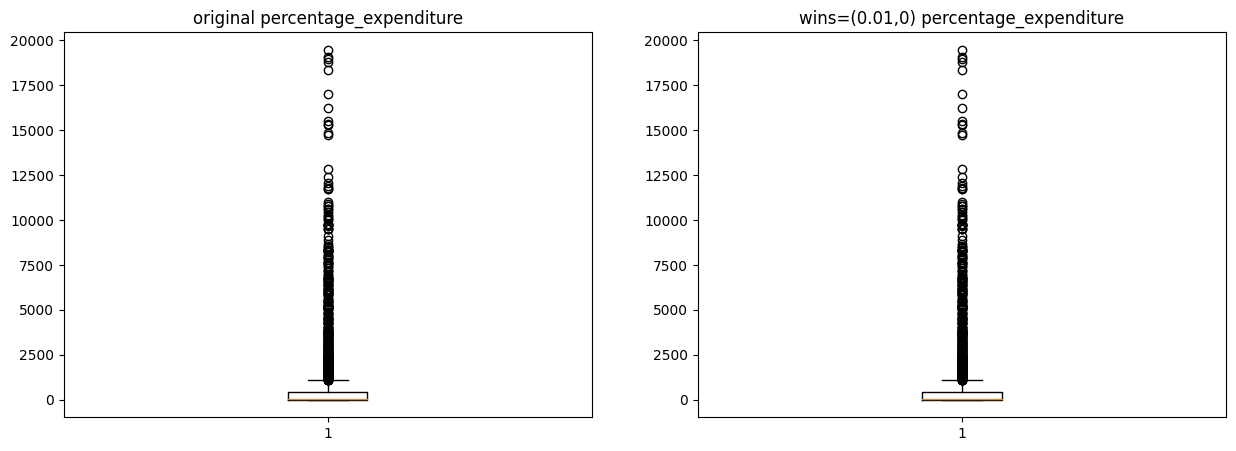

In [ ]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

['percentage_expenditure', 'total_expenditure', 'gdp', 'population', 'income_composition_of_resources', 'schooling', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'under-five_deaths', 'alcohol', 'hepatitis_b', 'measles', 'polio', 'diphtheria', 'hiv/aids', 'thinness_10-19_years', 'thinness_5-9_years']
thinness_5-9_years


<ipython-input-224-e8b56af49953>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


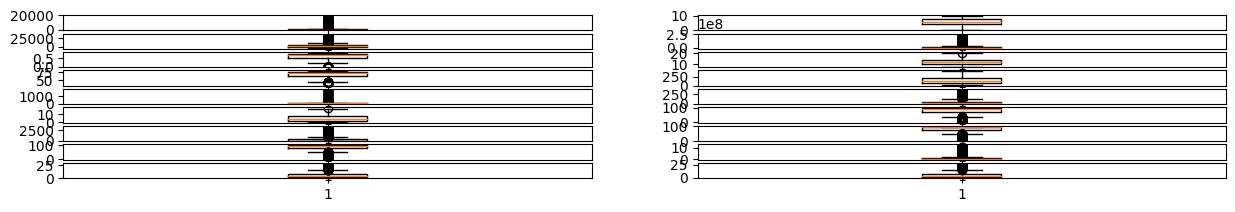

In [ ]:
print(cont_vars)
print(col)
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(21, 2, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

In [ ]:
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [ ]:
wins_df.describe()
nulls_breakdown(wins_df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

Filters

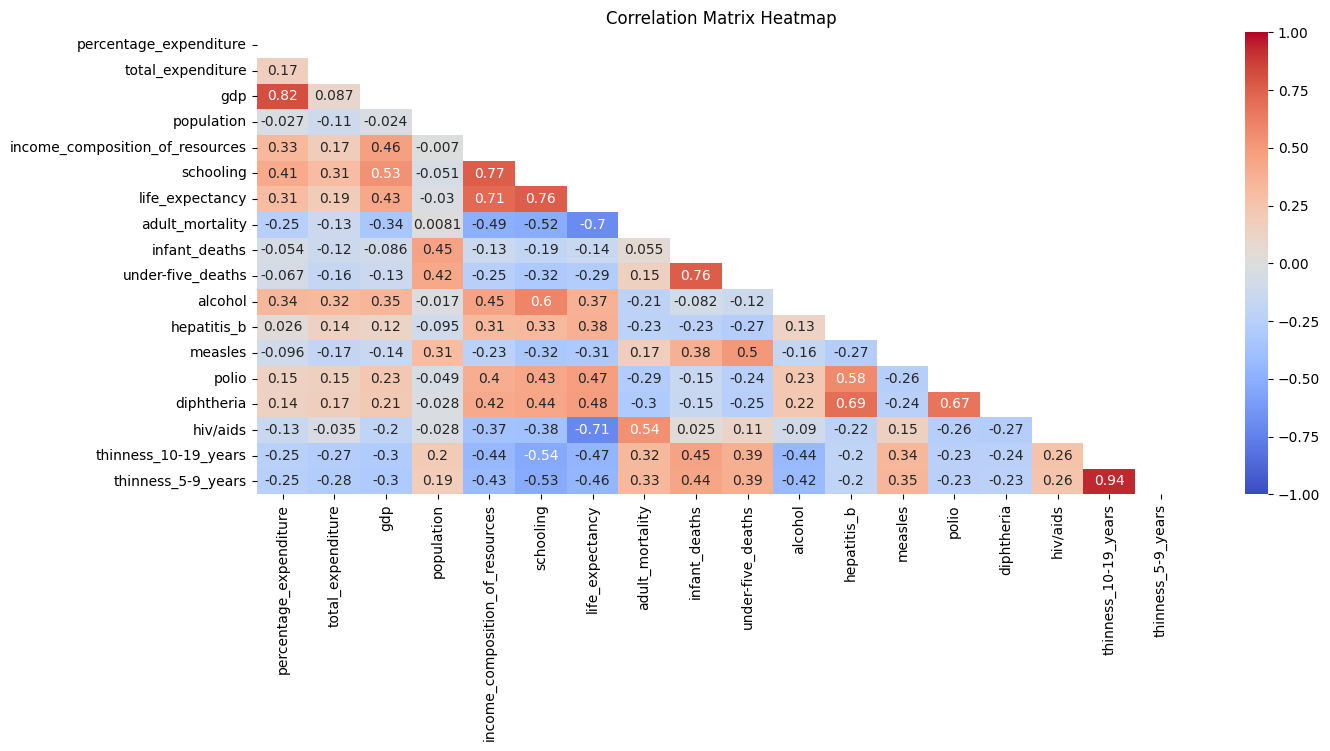

In [ ]:
mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(wins_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
df_filtered = wins_df[wins_df['year'] == 2015]
df_filtered

,country,status,year,percentage_expenditure,total_expenditure,gdp,population,income_composition_of_resources,schooling,life_expectancy,...,infant_deaths,under-five_deaths,alcohol,hepatitis_b,measles,polio,diphtheria,hiv/aids,thinness_10-19_years,thinness_5-9_years
0,Afghanistan,Developing,2015.0,71.279624,8.160000,584.259210,3.373649e+07,0.479,10.1,65.0,...,62.000000,83.000000,0.030000,65.0,1154.0,6.0,65.0,0.1,17.2,17.3
16,Albania,Developing,2015.0,364.975229,6.000000,3954.227830,2.887300e+04,0.762,14.2,77.1,...,37.527436,46.363388,4.600000,97.0,0.0,99.0,99.0,0.1,1.2,1.3
32,Algeria,Developing,2015.0,0.000000,6.182338,4132.762920,3.987153e+07,0.743,14.4,75.6,...,21.000000,24.000000,3.882293,95.0,63.0,95.0,95.0,0.1,6.0,5.8
48,Angola,Developing,2015.0,0.000000,5.112257,3695.793748,2.785935e+06,0.531,11.4,52.4,...,66.000000,98.000000,2.376947,64.0,118.0,7.0,64.0,1.9,8.3,8.2
64,Antigua and Barbuda,Developing,2015.0,0.000000,5.560289,13566.954100,1.549455e+07,0.784,13.9,76.4,...,37.812225,48.263247,3.820948,97.0,0.0,86.0,99.0,0.2,3.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,United States of America,Developed,2015.0,0.000000,6.520118,4393.921615,6.864909e+06,0.769,14.3,74.1,...,9.000000,10.000000,5.129227,87.0,0.0,87.0,87.0,0.1,1.6,1.5
2824,Uruguay,Developing,2015.0,0.000000,5.049356,4948.989510,1.342005e+07,0.678,12.6,76.0,...,28.000000,35.000000,1.499965,97.0,256.0,97.0,97.0,0.1,14.2,14.5
2840,Uzbekistan,Developing,2015.0,0.000000,4.561279,2430.044888,1.380700e+07,0.499,9.0,65.7,...,37.000000,47.000000,0.030000,69.0,468.0,63.0,69.0,0.1,13.6,13.4
2856,Vanuatu,Developing,2015.0,0.000000,5.620354,1313.889646,1.615870e+05,0.576,12.5,61.8,...,27.000000,40.000000,2.309448,9.0,9.0,9.0,9.0,4.1,6.3,6.1


In [ ]:
correlation_matrix=wins_df[cont_vars].corr()
correlation_with_life = correlation_matrix['life_expectancy'].abs().sort_values(ascending=False)

# Exclude 'lifeexpectancy' itself from the list
correlation_with_life = correlation_with_life.drop('life_expectancy')

# Get the top four correlated columns
top_correlations = correlation_with_life.head(4)

# Extract the column names
top_correlation_columns = top_correlations.index.tolist()

print("Top four correlated columns with 'life_expectancy':")
print(top_correlation_columns)

Top four correlated columns with 'life_expectancy':
['schooling', 'income_composition_of_resources', 'hiv/aids', 'adult_mortality']


In [ ]:
colsel = top_correlation_columns + ['year'] + ['life_expectancy']
new_df = df_filtered[colsel]
new_df

,schooling,income_composition_of_resources,hiv/aids,adult_mortality,year,life_expectancy
0,10.1,0.479,0.1,263.0,2015.0,65.0
16,14.2,0.762,0.1,74.0,2015.0,77.1
32,14.4,0.743,0.1,19.0,2015.0,75.6
48,11.4,0.531,1.9,335.0,2015.0,52.4
64,13.9,0.784,0.2,13.0,2015.0,76.4
...,...,...,...,...,...,...
2808,14.3,0.769,0.1,157.0,2015.0,74.1
2824,12.6,0.678,0.1,127.0,2015.0,76.0
2840,9.0,0.499,0.1,224.0,2015.0,65.7
2856,12.5,0.576,4.1,33.0,2015.0,61.8


In [ ]:
for column in top_correlation_columns:
    q1 = np.percentile(new_df[column], 25)
    q3 = np.percentile(new_df[column], 75)
    iqr = q3 - q1
    print(f"q1 for {column}: {q1}")
    print(f"q3 for {column}: {q3}")

q1 for schooling: 10.8
q3 for schooling: 15.0
q1 for income_composition_of_resources: 0.558
q3 for income_composition_of_resources: 0.804
q1 for hiv/aids: 0.1
q3 for hiv/aids: 0.4
q1 for adult_mortality: 75.0
q3 for adult_mortality: 211.0


In [ ]:
q1=np.percentile(new_df['life_expectancy'],25)
q3=np.percentile(new_df['life_expectancy'],75)
print(q1)
print(q3)

65.8
76.9


In [ ]:
df.columns

Index(['country', 'status', 'year', 'percentage_expenditure',
       'total_expenditure', 'gdp', 'population',
       'income_composition_of_resources', 'schooling', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'under-five_deaths', 'alcohol',
       'hepatitis_b', 'measles', 'polio', 'diphtheria', 'hiv/aids',
       'thinness_10-19_years', 'thinness_5-9_years'],
      dtype='object')

filtering countries with high life expectancy

In [ ]:
# Assuming df is your pandas DataFrame containing the dataset

# Filter out countries based on correlations
filtered_countries_high = wins_df[
    ((wins_df['adult_mortality'] < 75.5) |
    (wins_df['hiv/aids'] < 0.1) |
    (wins_df['income_composition_of_resources'] > 0.7945) |
    (wins_df['schooling'] > 14.85)) &
    (wins_df['life_expectancy'] > 76.95)
     & (wins_df['year'] == 2015)
]

# Output the filtered countries
print(filtered_countries_high.sort_values('life_expectancy'))


                               country      status    year  \
2760              United Arab Emirates  Developing  2015.0   
1536                         Lithuania   Developed  2015.0   
1600                          Malaysia  Developing  2015.0   
1632                              Mali  Developing  2015.0   
1818                             Nepal  Developing  2015.0   
1834                       Netherlands   Developed  2015.0   
1898                           Nigeria  Developing  2015.0   
2026                       Philippines  Developing  2015.0   
1312                           Jamaica  Developing  2015.0   
2042                            Poland   Developed  2015.0   
2074                             Qatar  Developing  2015.0   
2298                      Sierra Leone  Developing  2015.0   
2330                          Slovakia   Developed  2015.0   
2394                      South Africa  Developing  2015.0   
2474                          Suriname  Developing  2015.0   
2696    

In [ ]:
wins_df
nulls_breakdown(wins_df)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


filtering countries with low life expectancy

In [ ]:
# Filter out countries based on correlations
filtered_countries_low = wins_df[
    ((wins_df['adult_mortality'] > 213.0) |
    (wins_df['hiv/aids'] > 0.4) |
    (wins_df['income_composition_of_resources'] < 0.575) |
    (wins_df['schooling'] < 11.1)) &
    (wins_df['life_expectancy'] < 65.75)
     & (wins_df['year'] == 2015)
]

# Output the filtered countries
print(filtered_countries_low.sort_values('life_expectancy'))

                                    country      status    year  \
2282                             Seychelles  Developing  2015.0   
48                                   Angola  Developing  2015.0   
512                Central African Republic  Developing  2015.0   
528                                    Chad  Developing  2015.0   
432                           Côte d'Ivoire  Developing  2015.0   
1472                                Lebanon  Developing  2015.0   
1882                                  Niger  Developing  2015.0   
2362                        Solomon Islands  Developing  2015.0   
480                                Cameroon  Developing  2015.0   
1754                                Morocco  Developing  2015.0   
1616                               Maldives  Developing  2015.0   
832                             El Salvador  Developing  2015.0   
1568                             Madagascar  Developing  2015.0   
1088                                 Guinea  Developing  2015.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


cols=wins_df.columns.tolist()
cols.remove('life_expectancy')
cols.remove('country')
cols.remove('status')
cols.remove('year')
# Select independent variables (X) and the target variable (y)
X = wins_df[cols]  # Include your independent variables
y = wins_df['life_expectancy']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Lasso regression model
alpha = 0.01  # Adjust the regularization strength (alpha) as needed
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print the coefficients of the selected features
feature_names = X.columns
coefficients = model.coef_

Mean Squared Error: 12.918989842837451
R-squared: 0.8355016215230893


interactive plots

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


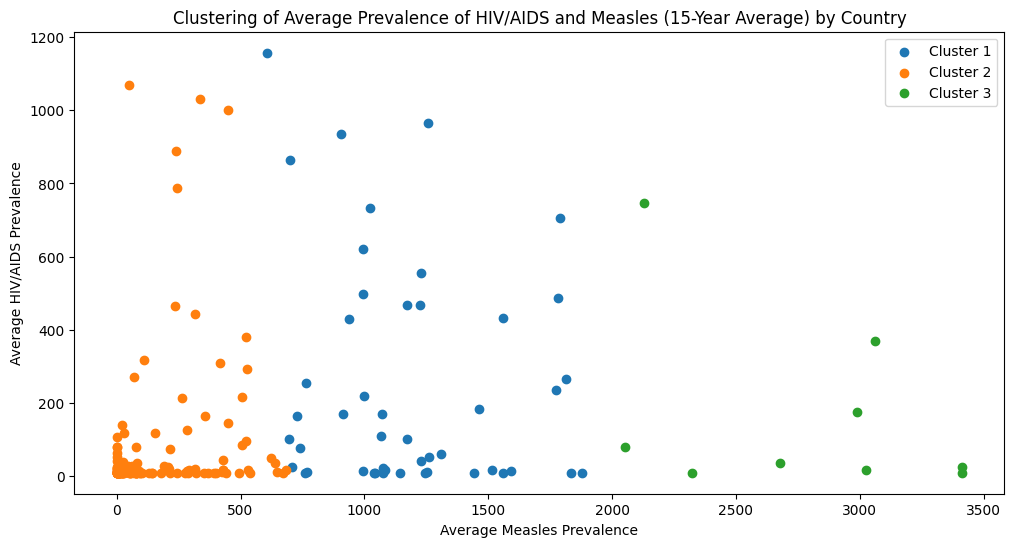

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset, assuming it's stored in a CSV file
# Replace 'your_dataset.csv' with the actual file path


# Define the features for clustering
features = ['measles', 'hiv/aids']

# Group the data by country and calculate the average prevalence over 15 years
average_data = wins_df.groupby('country')[features].mean()

# Create a K-Means model with the desired number of clusters
n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(3, random_state=0)
cluster_labels = kmeans.fit_predict(average_data)

# Plot the clustered data
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    plt.scatter(
        average_data[cluster_labels == i]['measles'],
        average_data[cluster_labels == i]['hiv/aids'],
        label=f'Cluster {i + 1}',
    )

# Set labels and legend
plt.xlabel('Average Measles Prevalence')
plt.ylabel('Average HIV/AIDS Prevalence')
plt.title('Clustering of Average Prevalence of HIV/AIDS and Measles (15-Year Average) by Country')
plt.legend()

# Show the plot
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
# Interactive Scatter Plot
scatter_plot = px.scatter(df, x='gdp', y='life_expectancy', color='country', hover_data=['year'])
scatter_plot.update_traces(marker=dict(size=12, opacity=0.8))
scatter_plot.update_layout(title='Interactive Scatter Plot: GDP vs Life Expectancy',
                          xaxis_title='GDP',
                          yaxis_title='Life Expectancy')

scatter_plot.show()

In [ ]:
# Interactive Histogram
histogram = px.histogram(df, x='life_expectancy', color='country', marginal='rug')
histogram.update_layout(title='Interactive Histogram: Life Expectancy',
                        xaxis_title='Life Expectancy',
                        yaxis_title='Count')

histogram.show()

In [ ]:
# boxplot for Status and life expectancy
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.show()

In [ ]:
# boxplot for Status and Schooling
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Schooling', data=df1)
plt.xlabel('Status')
plt.ylabel('Schooling')
plt.title('Schooling Years by Status')
plt.show()

In [ ]:
# interactive 3D graph for the 3 parameters
import plotly.express as px

# Sample data (replace this with your actual dataset)
countries = df['country']
status = df['status']
life_expectancy = df['life_expectancy']
schooling = df['schooling']

# Create a DataFrame
import pandas as pd
data = pd.DataFrame({'Country': countries, 'Status': status, 'Life Expectancy': life_expectancy, 'Schooling': schooling})

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(data, x='Status', y='Life Expectancy', z='Schooling', color='Status',
                    labels={'x': 'Status', 'y': 'Life Expectancy', 'z': 'Schooling'},
                    title='Interactive 3D Graph: Status, Life Expectancy, and Schooling',
                    text='Country')  # 'text' parameter for hover information

# Customize hover text
fig.update_traces(textposition='top center')

# Show the interactive plot
fig.show()

cluster and predictions

General insights gathered from data visualization



---

developed countries with high schooling have greater life expectancy

---



In [ ]:
# boxplot for Status and life expectancy
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.show()

Enter Country : India


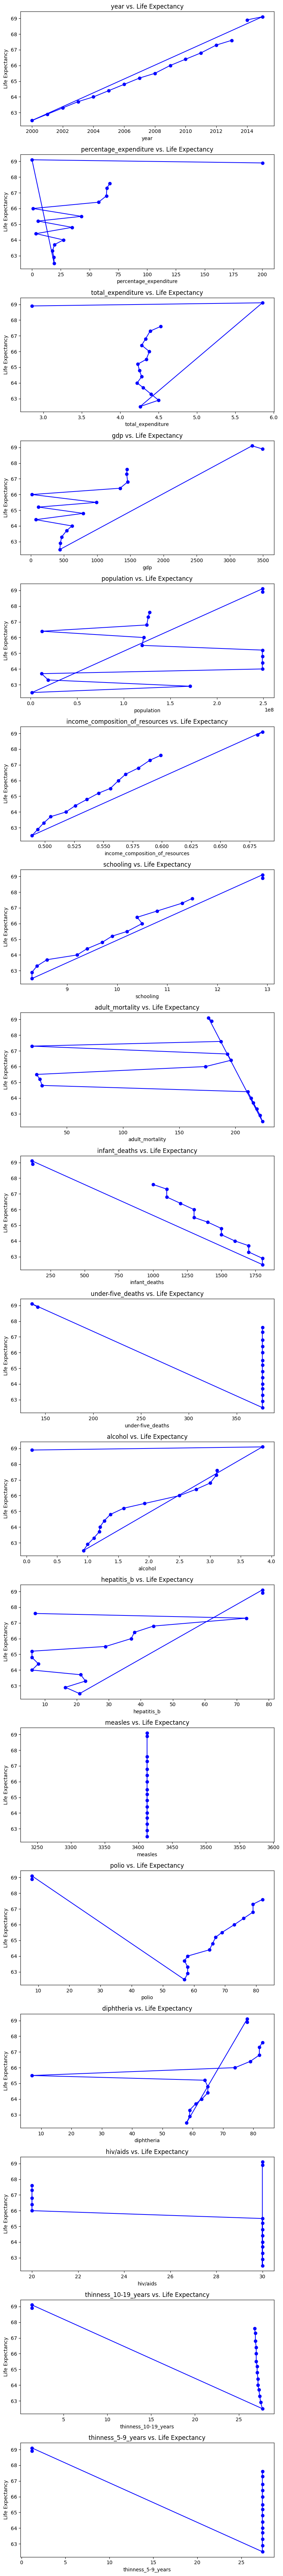

In [ ]:
inp_country=input("Enter Country : ")

# Filter the DataFrame to get data for the user input country
country_df = wins_df[wins_df['country'] == inp_country]
country_df
attributes = [col for col in country_df.columns if col != 'life_expectancy']
attributes.remove('country')
attributes.remove('status')
# Set up the number of rows and columns for subplots
num_rows = len(attributes)
num_cols = 1  # You can change this if you want a different number of columns

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4*num_rows))

# Ensure axes is a 2D array
if num_rows == 1:
    axes = [axes]

# Loop through the attributes and create plots
for i, attribute in enumerate(attributes):
    ax = axes[i]

    # Scatter plot of the current attribute vs. LifeExpectancy
    ax.plot(country_df[attribute], country_df['life_expectancy'], marker='o', linestyle='-', color='b')

    ax.set_xlabel(attribute)
    ax.set_ylabel('Life Expectancy')
    ax.set_title(f'{attribute} vs. Life Expectancy')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
!pip install seaborn matplotlib

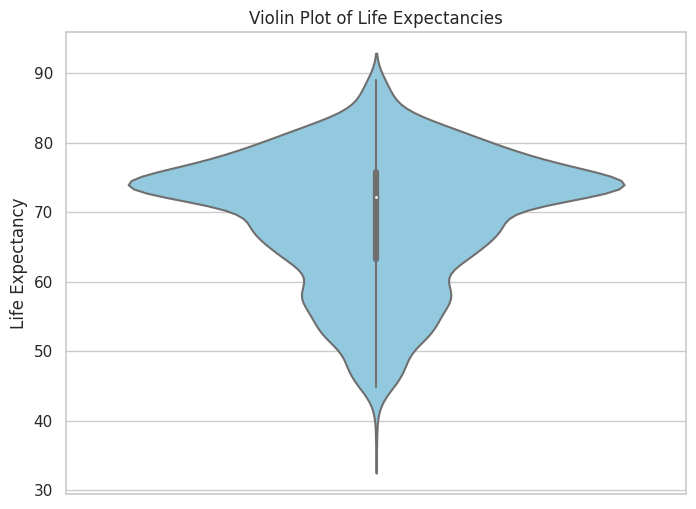

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot using seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Create the violin plot
sns.violinplot(y=df['life_expectancy'], color="skyblue")

# Add labels and title
plt.ylabel("Life Expectancy")
plt.title("Violin Plot of Life Expectancies")

# Display the plot
plt.show()


In [ ]:
import plotly.express as px

# Sample data (replace this with your actual dataset)
countries = wins_df['country']
GDP = wins_df['gdp']
life_expectancy = wins_df['life_expectancy']
schooling = wins_df['schooling']
status = wins_df['status']

# Create a DataFrame
import pandas as pd
data = pd.DataFrame({'Country': countries, 'GDP': GDP, 'Life Expectancy': life_expectancy, 'Schooling': schooling, 'Status': status})

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(data, x='GDP', y='Life Expectancy', z='Schooling', color='Status',
                    labels={'x': 'GDP', 'y': 'Life Expectancy', 'z': 'Schooling'},
                    title='Interactive 3D Graph: Life Expectancy based on status, schooling, and GDP')

# Customize hover text
fig.update_traces(textposition='top center')

# Show the interactive plot
fig.show()


In [ ]:
# Find the index of the row with the highest life expectancy value
max_life_expectancy_index = filtered_countries_high['life_expectancy'].idxmax()
# Extract the row with the highest life expectancy value into a new DataFrame
highest_life_expectancy_df = filtered_countries_high.loc[max_life_expectancy_index:max_life_expectancy_index]
highest_life_expectancy_df

,country,status,year,percentage_expenditure,total_expenditure,gdp,population,income_composition_of_resources,schooling,life_expectancy,...,infant_deaths,under-five_deaths,alcohol,hepatitis_b,measles,polio,diphtheria,hiv/aids,thinness_10-19_years,thinness_5-9_years
16,Albania,Developing,2015.0,364.975229,6.0,3954.22783,28873.0,0.762,14.2,77.1,...,37.527436,46.363388,4.6,97.0,0.0,99.0,99.0,0.1,1.2,1.3


In [ ]:
# Find the index of the row with the highest life expectancy value
min_life_expectancy_index = filtered_countries_low['life_expectancy'].idxmin()
# Extract the row with the highest life expectancy value into a new DataFrame
lowest_life_expectancy_df = filtered_countries_low.loc[min_life_expectancy_index:min_life_expectancy_index]
lowest_life_expectancy_df

,country,status,year,percentage_expenditure,total_expenditure,gdp,population,income_composition_of_resources,schooling,life_expectancy,...,infant_deaths,under-five_deaths,alcohol,hepatitis_b,measles,polio,diphtheria,hiv/aids,thinness_10-19_years,thinness_5-9_years
2282,Seychelles,Developing,2015.0,0.0,5.316141,587.538233,723725.0,0.431,9.5,51.0,...,22.0,30.0,1.281418,86.0,607.0,86.0,86.0,0.5,7.4,7.3


In [ ]:
c1=str(highest_life_expectancy_df['country'])
print(c1)
c2=str(lowest_life_expectancy_df['country'])
print(c2)


16    Albania
Name: country, dtype: object
2282    Seychelles
Name: country, dtype: object


['year', 'percentage_expenditure', 'total_expenditure', 'gdp', 'population', 'income_composition_of_resources', 'schooling', 'adult_mortality', 'infant_deaths', 'under-five_deaths', 'alcohol', 'hepatitis_b', 'measles', 'polio', 'diphtheria', 'hiv/aids', 'thinness_10-19_years', 'thinness_5-9_years']


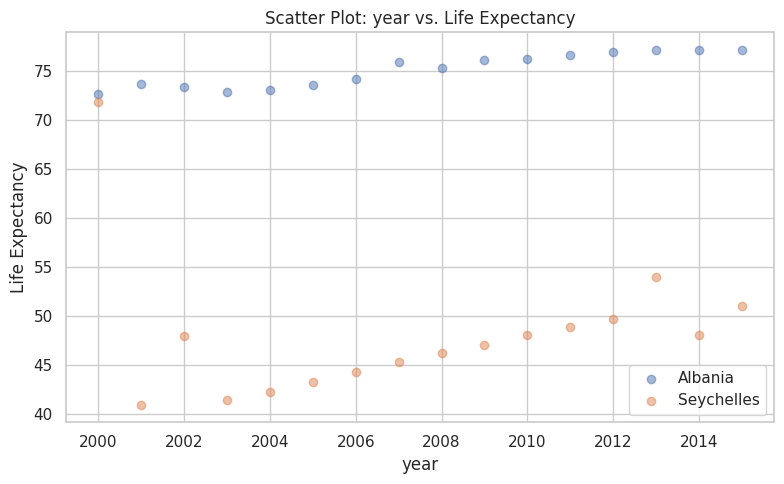

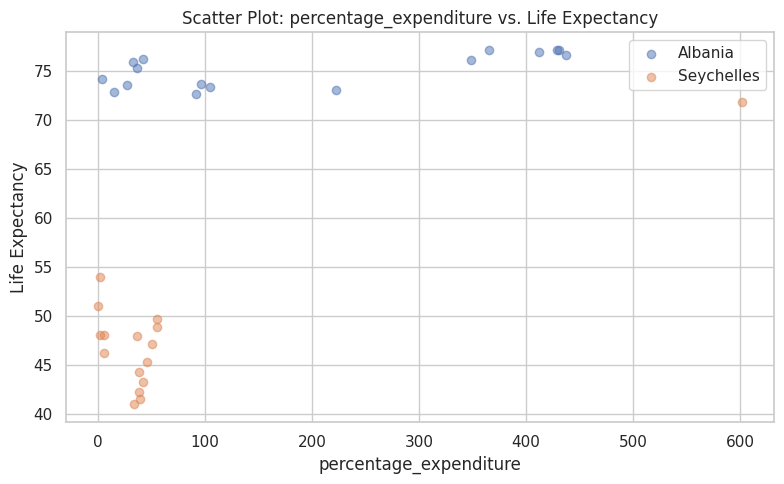

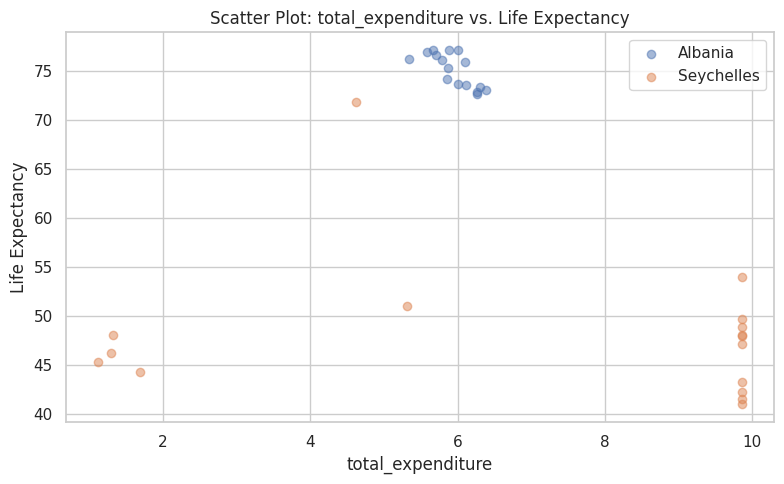

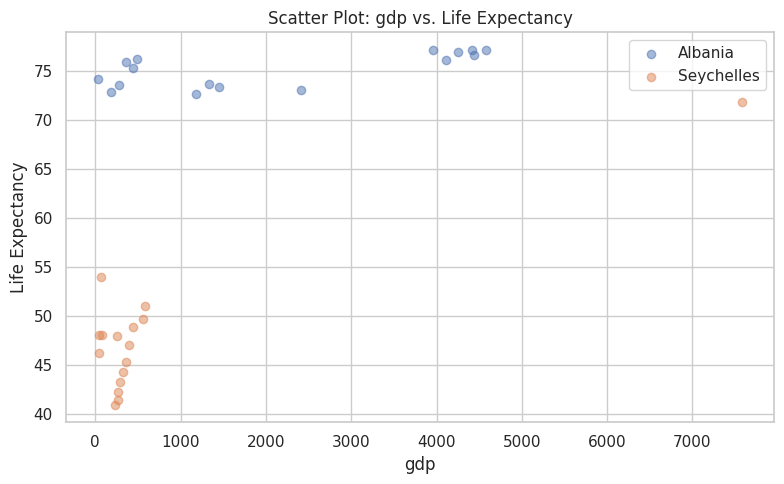

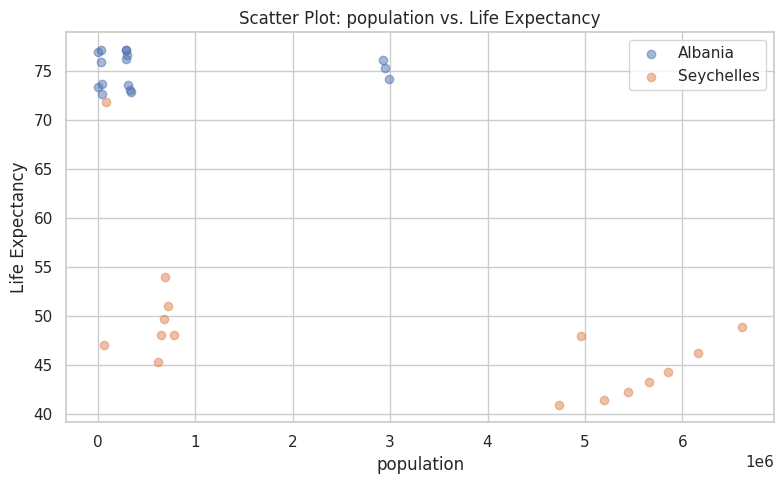

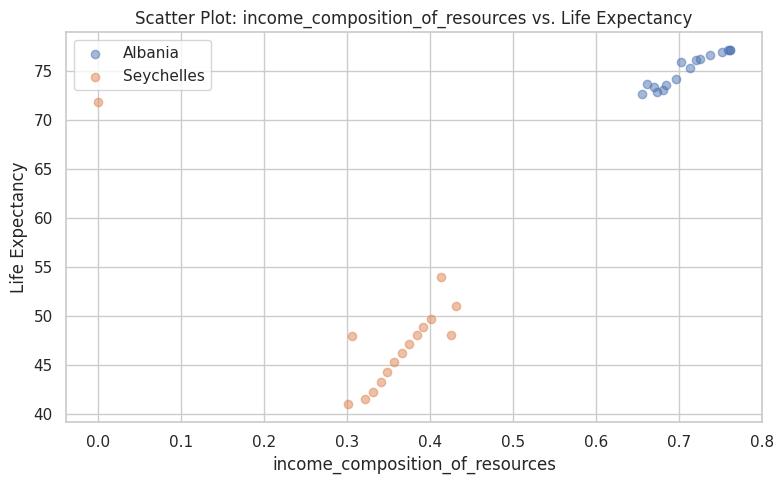

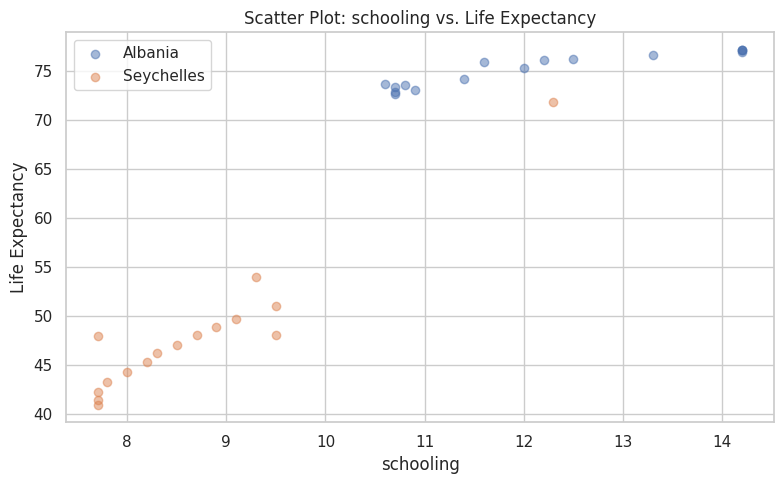

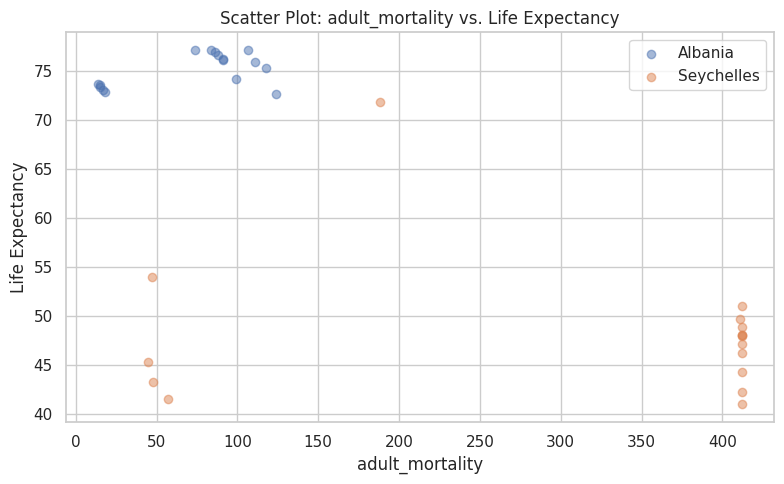

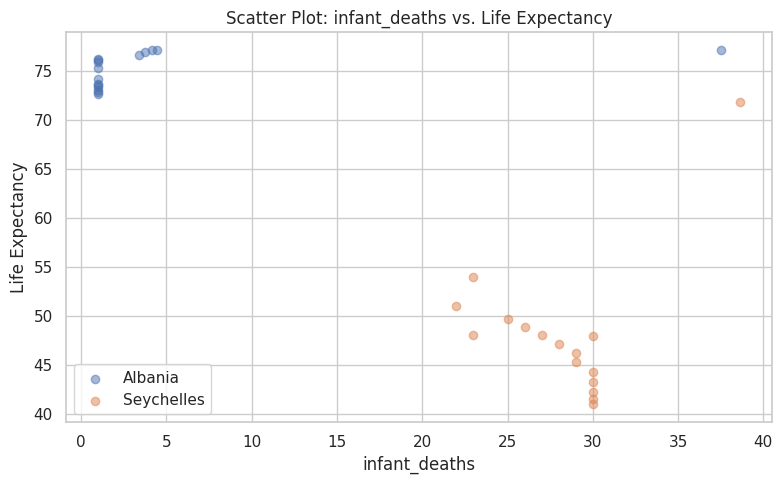

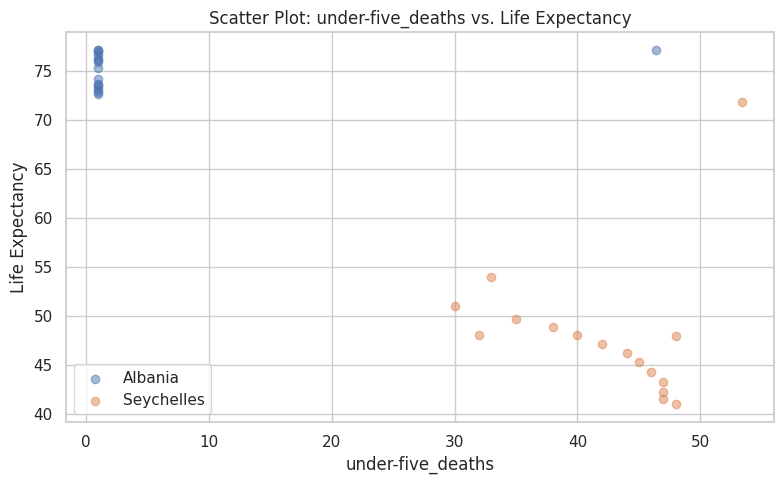

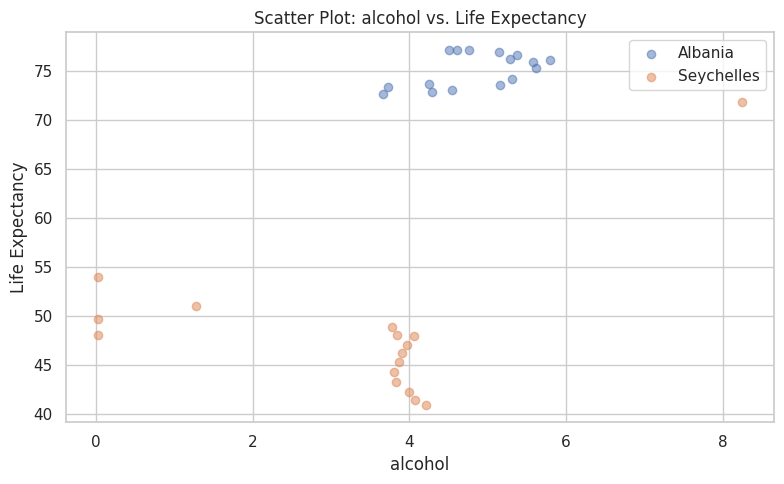

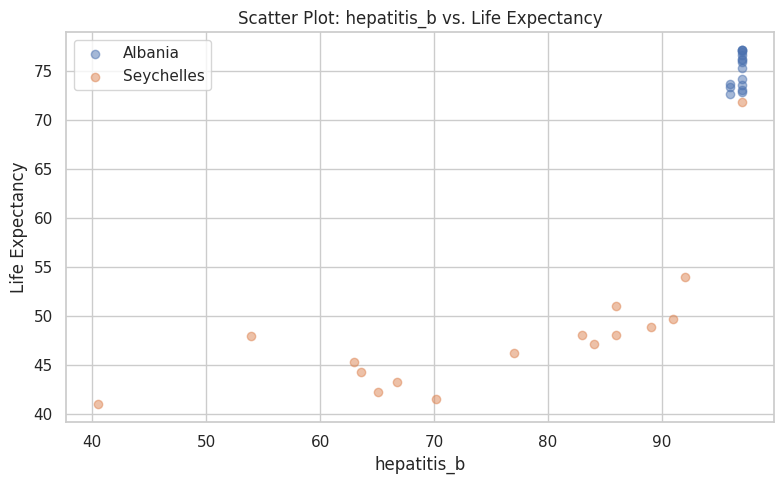

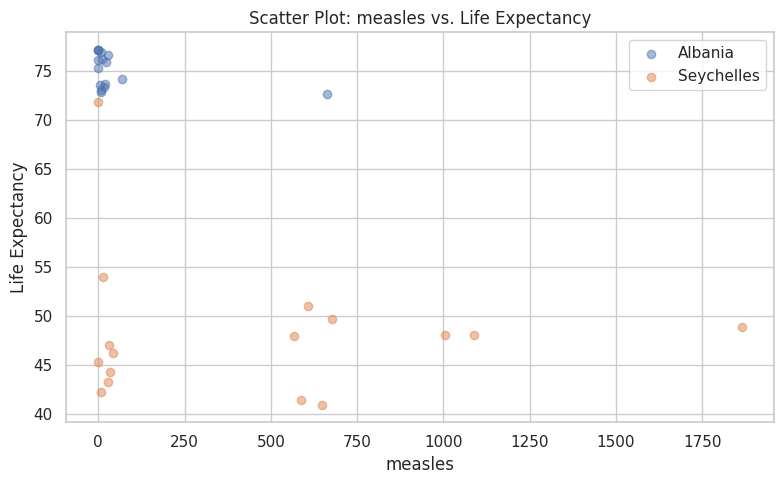

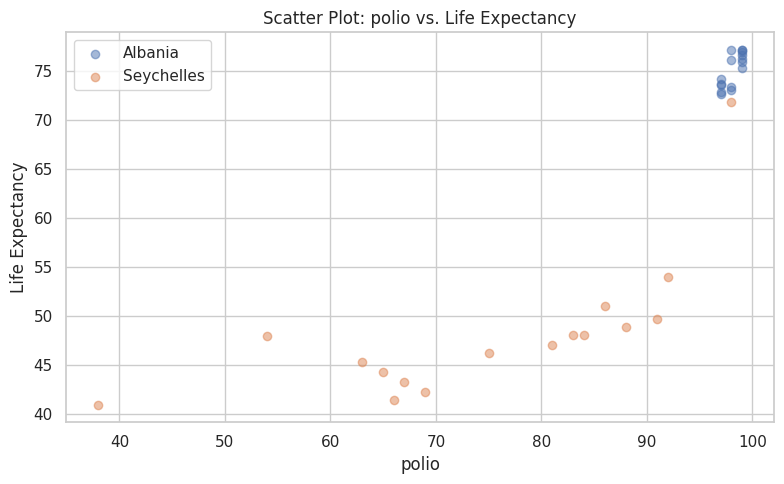

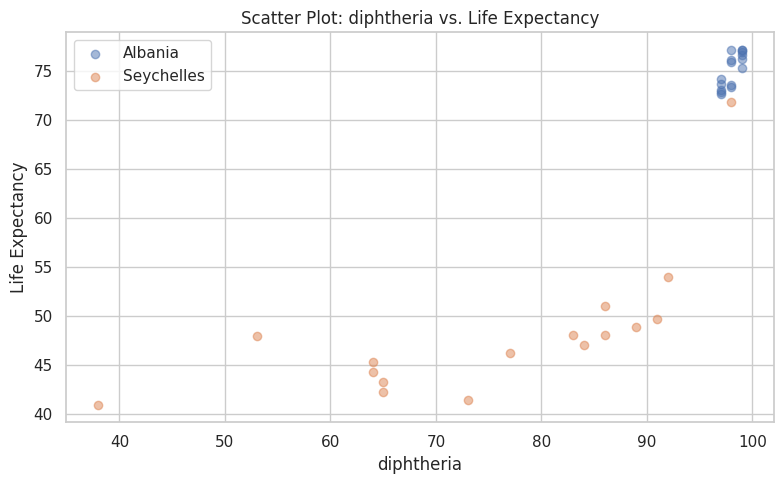

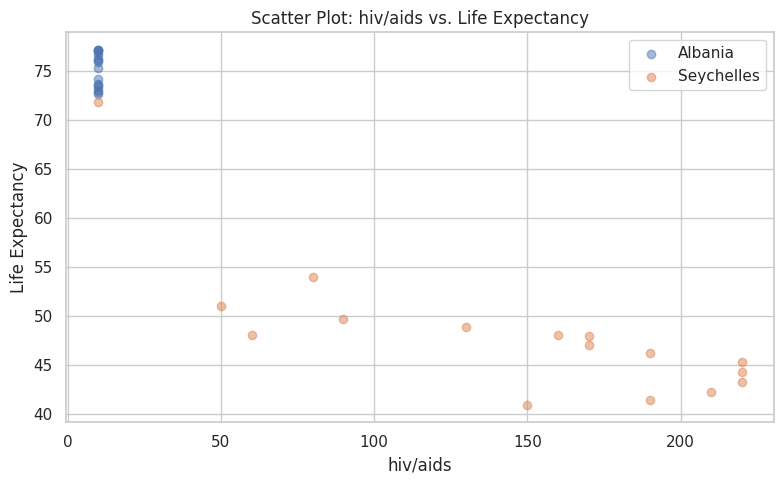

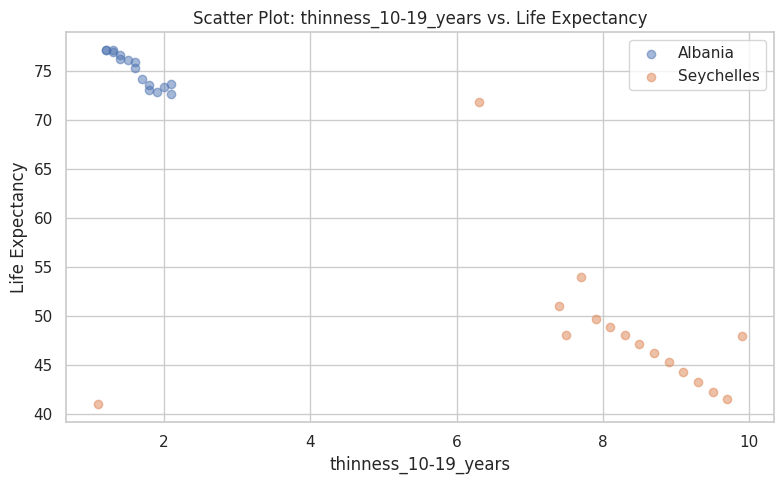

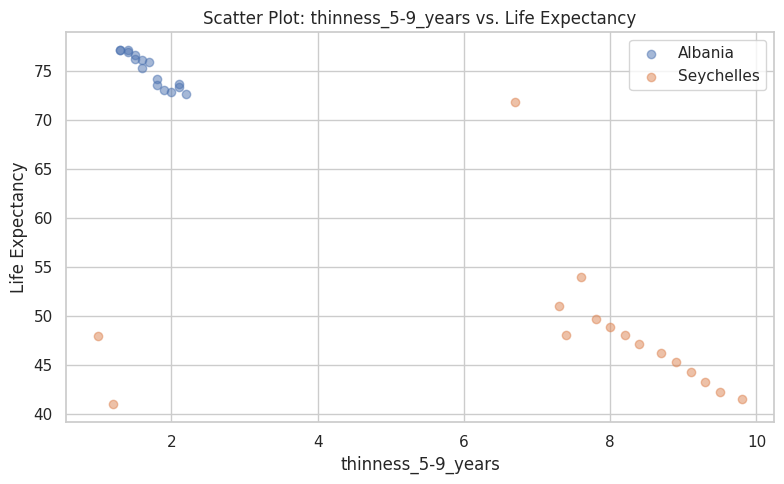

In [ ]:
# Filter data for country_df1
country_df1 = wins_df[wins_df['country'] == 'Albania']

# Filter data for country_df2
country_df2 = wins_df[wins_df['country'] == 'Seychelles']

attributes = [col for col in country_df1.columns if col not in ['life_expectancy', 'country', 'status']]
print(attributes)
# Set up the number of rows and columns for subplots
num_rows = len(attributes)
num_cols = 1  # You can change this if you want a different number of columns






for attribute in attributes:
    plt.figure(figsize=(8, 5))

    plt.scatter(country_df1[attribute], country_df1['life_expectancy'], label='Albania', alpha=0.5)
    plt.scatter(country_df2[attribute], country_df2['life_expectancy'], label='Seychelles', alpha=0.5)

    plt.xlabel(attribute)
    plt.ylabel('Life Expectancy')
    plt.title(f'Scatter Plot: {attribute} vs. Life Expectancy')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:

# Sort the DataFrame by 'Life_Expectancy' in descending order and get the top 5 rows
top_5_life_expectancy_df = filtered_countries_high.sort_values(by='life_expectancy', ascending=False).head(5)



# Sort the DataFrame by 'Life_Expectancy' in descending order and get the top 5 rows
top_5_low_life_expectancy_df = filtered_countries_low.sort_values(by='life_expectancy', ascending=True).head(5)



list1= top_5_life_expectancy_df['country'].tolist()

list2= top_5_low_life_expectancy_df['country'].tolist()


In [ ]:
# Filter data for country_df1
country_df1 = wins_df[wins_df['country'].isin(list1)]

# Filter data for country_df2
country_df2 = wins_df[wins_df['country'].isin(list2)]


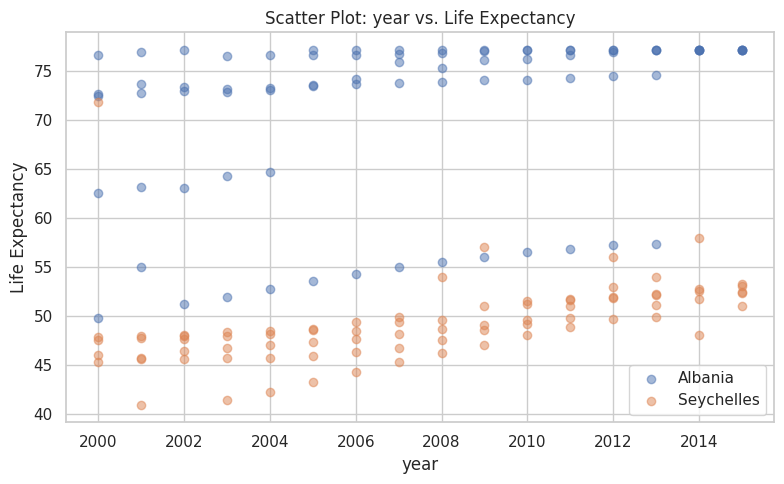

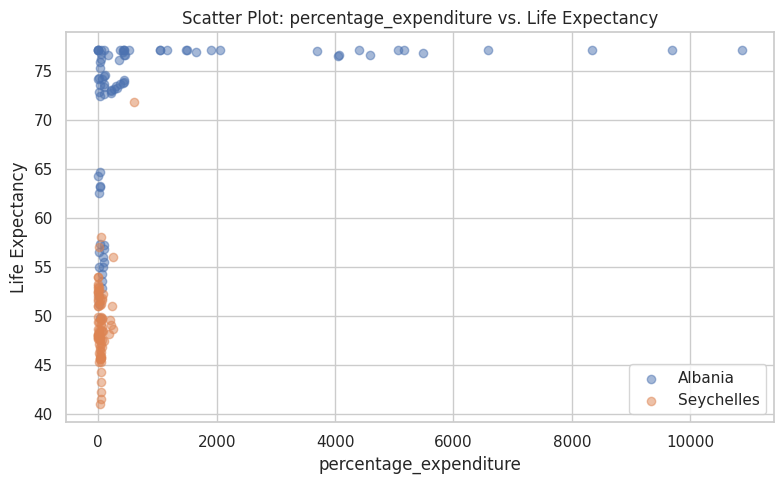

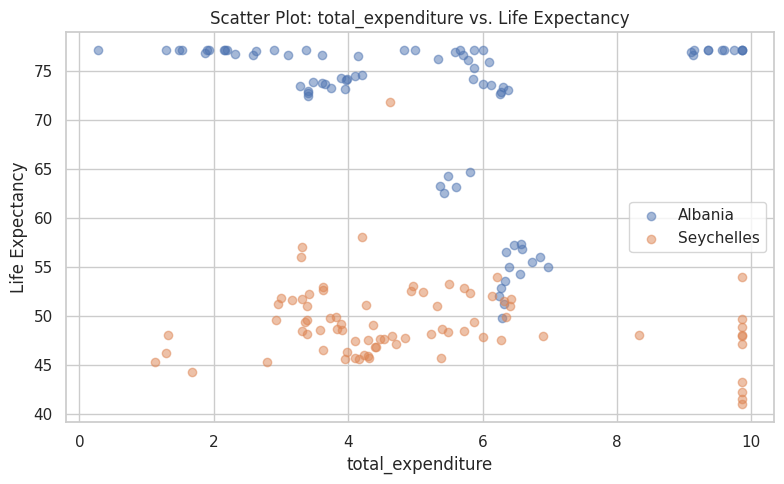

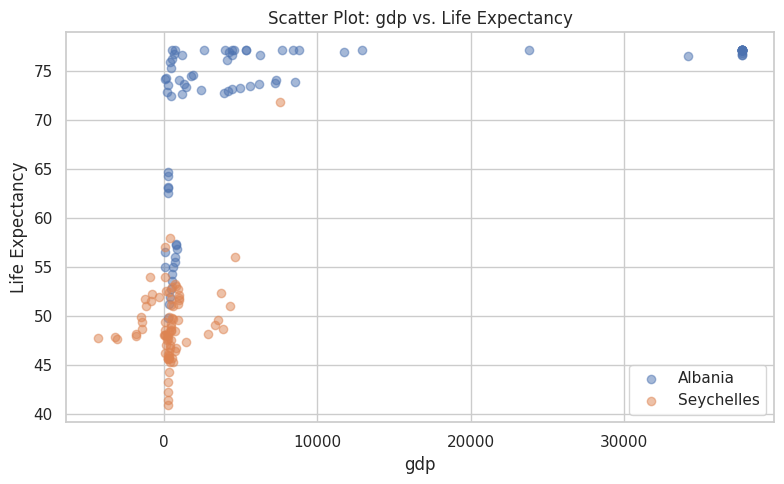

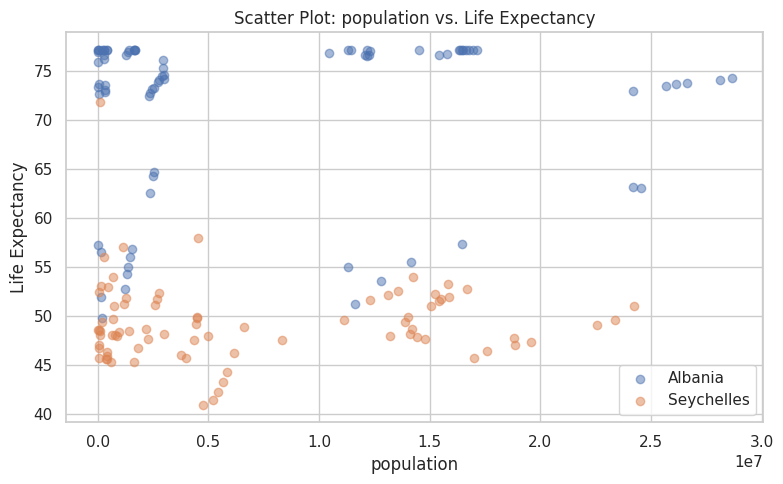

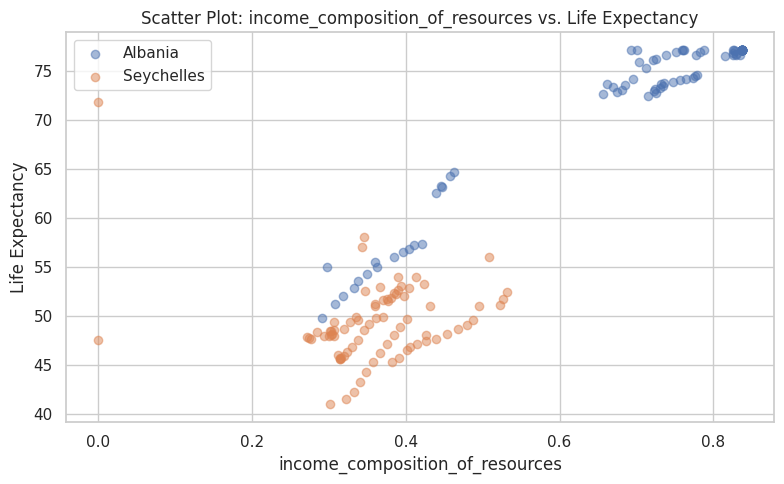

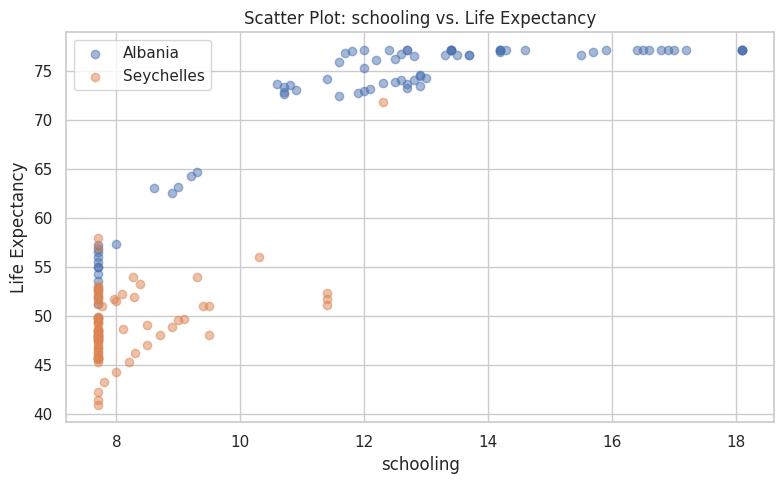

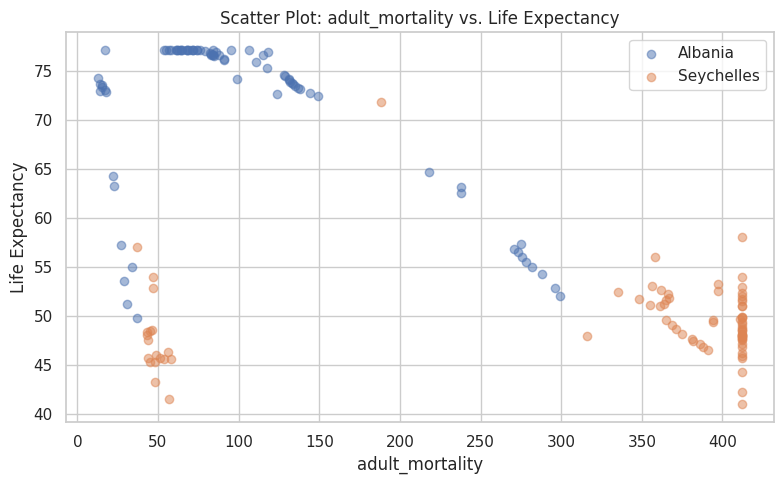

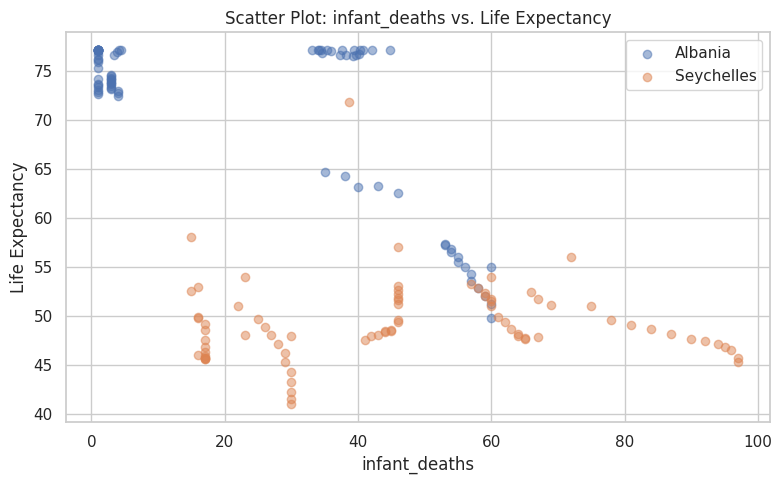

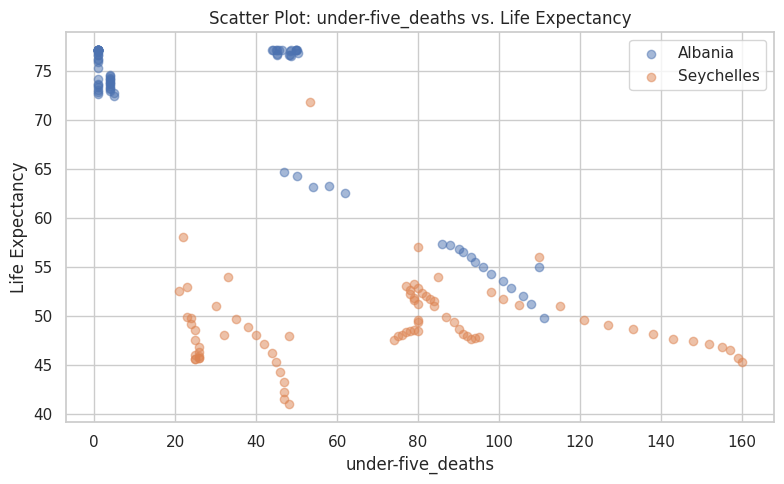

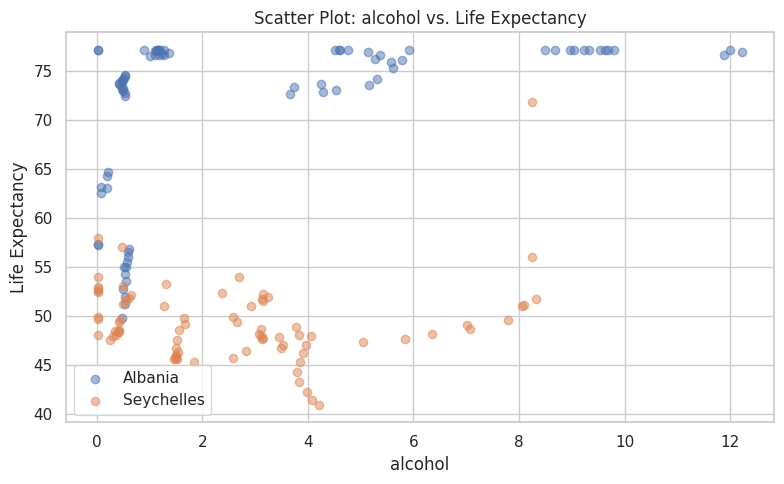

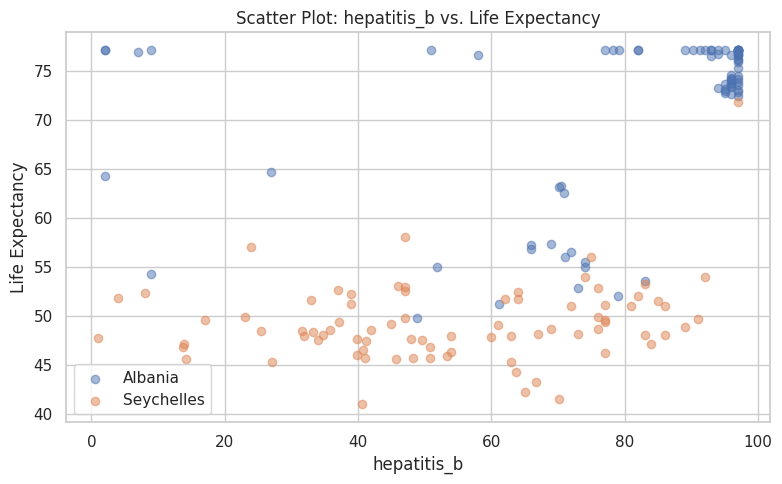

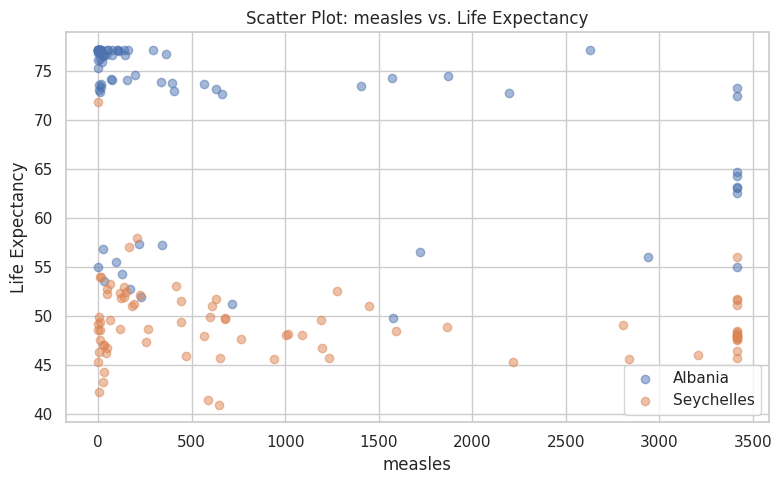

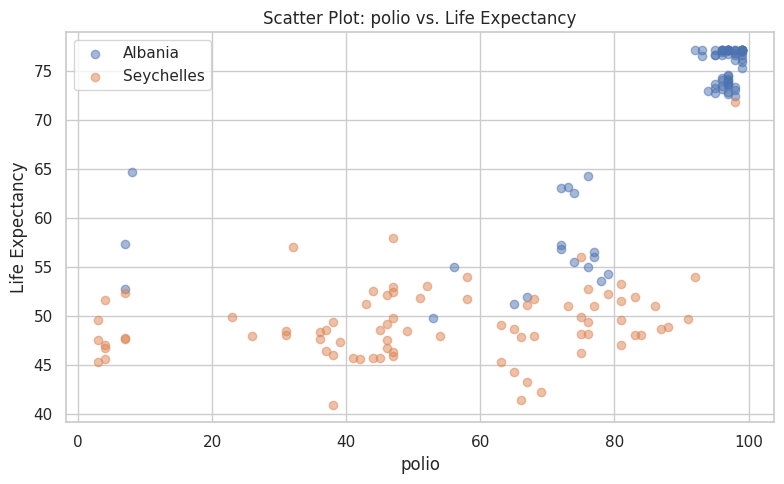

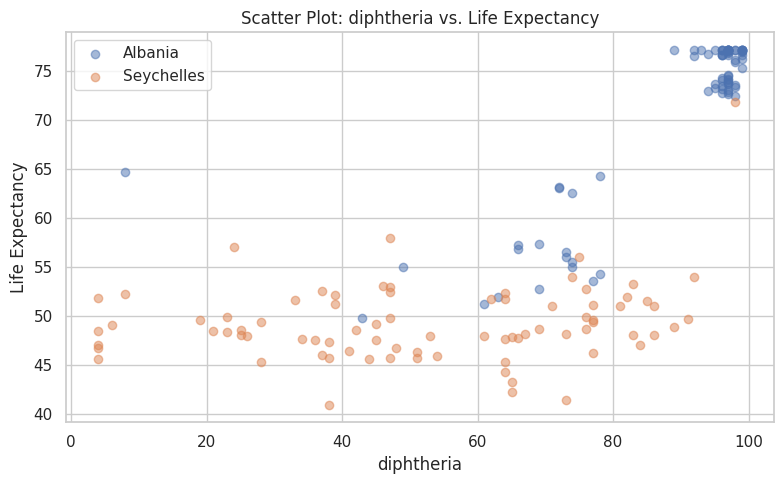

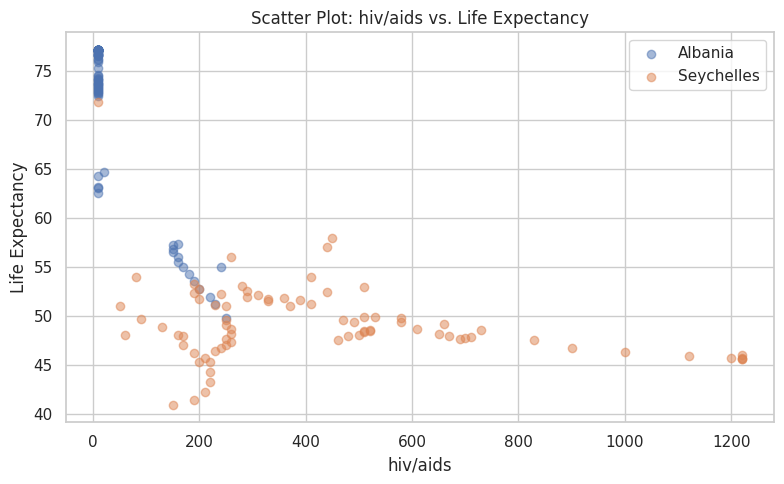

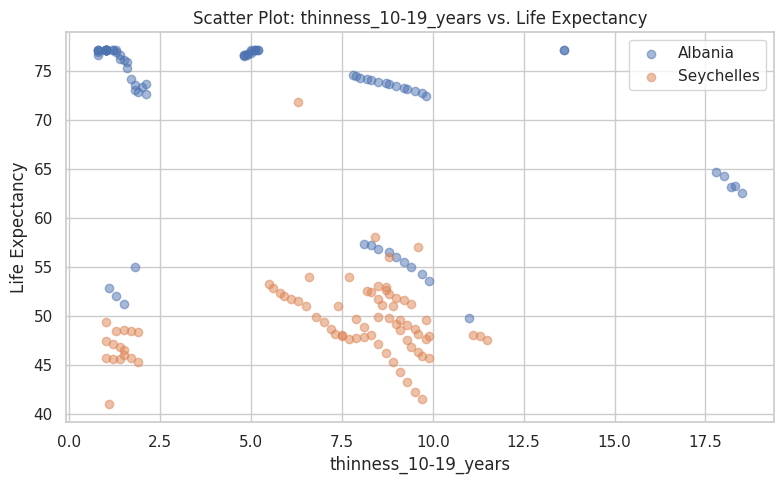

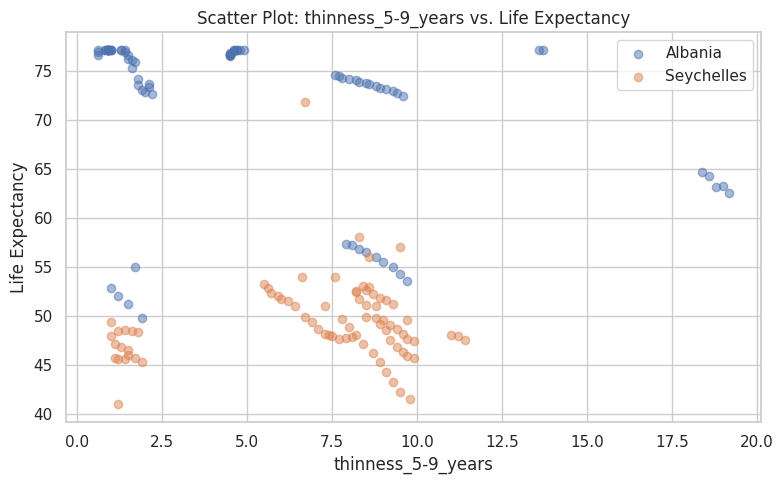

In [ ]:
attributes = [col for col in country_df1.columns if col not in ['life_expectancy', 'country', 'status']]

# Set up the number of rows and columns for subplots
num_rows = len(attributes)
num_cols = 1  # You can change this if you want a different number of columns




# Loop through the attributes and create plots
# for i, attribute in enumerate(attributes):
#     plt.scatter(country_df1[attribute], country_df1['life_expectancy'], label='Albania', alpha=0.5)
#     plt.scatter(country_df2[attribute], country_df2['life_expectancy'], label='Seychelles', alpha=0.5)

#     plt.xlabel(attribute)
#     plt.ylabel('Life Expectancy')
#     plt.title(f'Scatter Plot: {attribute} vs. Life Expectancy')
#     plt.legend()

for attribute in attributes:
    plt.figure(figsize=(8, 5))

    plt.scatter(country_df1[attribute], country_df1['life_expectancy'], label='Albania', alpha=0.5)
    plt.scatter(country_df2[attribute], country_df2['life_expectancy'], label='Seychelles', alpha=0.5)

    plt.xlabel(attribute)
    plt.ylabel('Life Expectancy')
    plt.title(f'Scatter Plot: {attribute} vs. Life Expectancy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Add a legend to distinguish between the two countries


# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plots
# plt.show()